In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv('/content/Liver RNA Data.csv')

# Show basic info
print("Dataset Info:")
print(data.info())

# Show first few rows
print("\nFirst 5 rows:")
print(data.head())

# Check for missing values
print("\nMissing values per column:")
print(data.isnull().sum())

# Show shape
print(f"\nShape of dataset: {data.shape}")

# If label column is 'Label' (could be 'Status' or something else), show class distribution
if 'Label' in data.columns:
    print("\nClass distribution:")
    print(data['Label'].value_counts())
    sns.countplot(data['Label'])
    plt.title("Class Distribution (Normal vs Cancer)")
    plt.show()
else:
    print("\nLabel column not found — please confirm the name of the class/label column.")


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77 entries, 0 to 76
Columns: 20531 entries, ARHGEF10L to sample_type_id
dtypes: float64(20531)
memory usage: 12.1 MB
None

First 5 rows:
   ARHGEF10L   HIF3A   RNF17    RNF10    RNF11    RNF13  GTF2IP1    REM1  \
0    11.1818  5.2482  4.1956  11.5047   9.5995   9.6257  11.8053  5.6835   
1    11.0186  5.3847  0.0000  11.6690  11.3980  10.8249  11.5487  3.5408   
2    11.2430  4.0013  0.0000  12.0791   9.8248  10.5608  12.1228  3.5582   
3    11.1612  2.9374  0.0000  12.5931   9.9459  10.5179  12.5044  1.7444   
4    12.0167  4.7857  0.0000  11.4616  10.8368  10.1428  12.9470  3.8613   

    MTVR2  RTN4RL2  ...   NPY5R   GNGT2   GNGT1   TULP3     PTRF   BCL6B  \
0  0.0000   8.7486  ...  0.8379  6.1672  1.7494  8.0444  12.3759  8.0357   
1  1.4714   7.9144  ...  3.5408  5.5302  0.0000  7.5066  10.5302  7.3741   
2  0.0000   7.9795  ...  2.1586  3.1834  0.0000  8.8500   9.5592  8.5064   
3  0.0000  10.3039  ...  0.8347  3.581

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Drop rows with any missing values
data_clean = data.dropna()

# Separate features and labels
X = data_clean.drop('sample_type_id', axis=1)
y = data_clean['sample_type_id']

# Normalize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split into Train (70%), Validation (15%), Test (15%)
X_train, X_temp, y_train, y_temp = train_test_split(X_scaled, y, test_size=0.30, random_state=42, stratify=y)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.50, random_state=42, stratify=y_temp)

print(f"Train set: {X_train.shape}, Validation set: {X_val.shape}, Test set: {X_test.shape}")


Train set: (53, 20530), Validation set: (11, 20530), Test set: (12, 20530)


In [5]:
!pip install tensorflow
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

# Build the model
model = Sequential()

# Input layer: number of input features is 20530 (same as number of columns excluding target)
model.add(Dense(1024, input_dim=X_train.shape[1], activation='relu'))  # First hidden layer
model.add(Dense(512, activation='relu'))  # Second hidden layer
model.add(Dense(256, activation='relu'))  # Third hidden layer
model.add(Dense(1, activation='sigmoid'))  # Output layer (binary classification)

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

# Early stopping to prevent overfitting (if validation accuracy doesn't improve)
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Train the model
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=100, batch_size=32, callbacks=[early_stopping])

# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f'Test Accuracy: {test_acc:.4f}')


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 644.9/644.9 MB 1.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.5/57.5 kB 4.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.5/24.5 MB 84.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 118.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.1/5.1 MB 114.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.6/6.6 MB 123.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.5/224.5 kB 19.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.5/72.5 kB 6.8 MB/s eta 0:00:00


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 3s 1s/step - accuracy: 0.7115 - loss: 0.4759 - val_accuracy: 0.9091 - val_loss: 1.3846
Epoch 2/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 795ms/step - accuracy: 0.9080 - loss: 1.3641 - val_accuracy: 0.9091 - val_loss: 3.5874
Epoch 3/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 787ms/step - accuracy: 0.9874 - loss: 0.1447 - val_accuracy: 0.9091 - val_loss: 3.5733
Epoch 4/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 905ms/step - accuracy: 1.0000 - loss: 9.8081e-18 - val_accuracy: 0.9091 - val_loss: 0.3301
Epoch 5/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 818ms/step - accuracy: 1.0000 - loss: 1.3282e-08 - val_accuracy: 0.9091 - val_loss: 0.2335
Epoch 6/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 789ms/step - accuracy: 0.9310 - loss: 1.9178 - val_accuracy: 0.9091 - val_loss: 5.4793
Epoch 7/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 887ms/step - accuracy: 1.0000 - loss: 2.0092e-22 - val_accuracy: 0.9091 - val_loss: 11.2027
Epoch 8/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 898ms/step - accuracy: 1.0000 - loss: 2.7191e-19 - val_accura

In [6]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

# Model Definition
model = Sequential()

# Input Layer
model.add(Dense(512, input_dim=X_train.shape[1], activation='relu'))

# Hidden Layers with Batch Normalization, Dropout
model.add(BatchNormalization())  # Batch Normalization
model.add(Dropout(0.5))  # Dropout to avoid overfitting
model.add(Dense(256, activation='relu'))
model.add(BatchNormalization())  # Batch Normalization
model.add(Dropout(0.5))  # Dropout to avoid overfitting

# Output Layer
model.add(Dense(1, activation='sigmoid'))

# Compile the Model with Adam Optimizer and Lower Learning Rate
optimizer = Adam(learning_rate=0.0001)  # Lower learning rate for better convergence
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

# Early Stopping to prevent overfitting and save the best weights
early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Model Summary
model.summary()

# Train the Model with Early Stopping and Data Augmentation
history = model.fit(X_train, y_train, epochs=100, batch_size=32,
                    validation_data=(X_val, y_val),
                    callbacks=[early_stop], verbose=2)

# Evaluation
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {accuracy*100:.2f}%")


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                 │ (None, 512)            │    10,511,872 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 512)            │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 1)              │           257 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 10,646,529 (40.61 MB)

 Trainable params: 10,644,993 (40.61 MB)

 Non-trainable params: 1,536 (6.00 KB)

Epoch 1/100
2/2 - 3s - 1s/step - accuracy: 0.5094 - loss: 1.0223 - val_accuracy: 0.7273 - val_loss: 0.5871
Epoch 2/100
2/2 - 1s - 457ms/step - accuracy: 0.6415 - loss: 0.6796 - val_accuracy: 0.7273 - val_loss: 0.7058
Epoch 3/100
2/2 - 1s - 429ms/step - accuracy: 0.6038 - loss: 0.9118 - val_accuracy: 0.7273 - val_loss: 0.8026
Epoch 4/100
2/2 - 1s - 473ms/step - accuracy: 0.6792 - loss: 0.5369 - val_accuracy: 0.7273 - val_loss: 0.9021
Epoch 5/100
2/2 - 1s - 447ms/step - accuracy: 0.7736 - loss: 0.5378 - val_accuracy: 0.8182 - val_loss: 0.9921
Epoch 6/100
2/2 - 1s - 521ms/step - accuracy: 0.7736 - loss: 0.5003 - val_accuracy: 0.8182 - val_loss: 1.0858
Epoch 7/100
2/2 - 1s - 470ms/step - accuracy: 0.8491 - loss: 0.3944 - val_accuracy: 0.8182 - val_loss: 1.1620
Epoch 8/100
2/2 - 1s - 448ms/step - accuracy: 0.8302 - loss: 0.3922 - val_accuracy: 0.8182 - val_loss: 1.2347
Epoch 9/100
2/2 - 1s - 448ms/step - accuracy: 0.7358 - loss: 0.5655 - val_accuracy: 0.8182 - val_loss: 1.2968
Epoch 10/100


In [7]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization, Input
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

# Model Definition with Input Layer
model = Sequential()

# Define the Input Layer explicitly
model.add(Input(shape=(X_train.shape[1],)))  # Replace input_dim with Input layer

# Hidden Layers with Batch Normalization, Dropout
model.add(Dense(512, activation='relu'))
model.add(BatchNormalization())  # Batch Normalization
model.add(Dropout(0.5))  # Dropout to avoid overfitting
model.add(Dense(256, activation='relu'))
model.add(BatchNormalization())  # Batch Normalization
model.add(Dropout(0.5))  # Dropout to avoid overfitting

# Output Layer
model.add(Dense(1, activation='sigmoid'))

# Compile the Model with Adam Optimizer and Lower Learning Rate
optimizer = Adam(learning_rate=0.0001)  # Lower learning rate for better convergence
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

# Early Stopping to prevent overfitting and save the best weights
early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Model Summary
model.summary()

# Train the Model with Early Stopping
history = model.fit(X_train, y_train, epochs=100, batch_size=32,
                    validation_data=(X_val, y_val),
                    callbacks=[early_stop], verbose=2)

# Evaluation
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {accuracy*100:.2f}%")


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_7 (Dense)                 │ (None, 512)            │    10,511,872 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 512)            │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 1)              │           257 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 10,646,529 (40.61 MB)

 Trainable params: 10,644,993 (40.61 MB)

 Non-trainable params: 1,536 (6.00 KB)

Epoch 1/100
2/2 - 3s - 1s/step - accuracy: 0.4906 - loss: 1.1317 - val_accuracy: 0.7273 - val_loss: 0.6461
Epoch 2/100
2/2 - 1s - 477ms/step - accuracy: 0.6415 - loss: 0.9059 - val_accuracy: 0.7273 - val_loss: 0.8295
Epoch 3/100
2/2 - 1s - 436ms/step - accuracy: 0.7170 - loss: 0.6443 - val_accuracy: 0.7273 - val_loss: 0.9740
Epoch 4/100
2/2 - 1s - 435ms/step - accuracy: 0.7170 - loss: 0.5872 - val_accuracy: 0.7273 - val_loss: 1.1124
Epoch 5/100
2/2 - 1s - 443ms/step - accuracy: 0.7925 - loss: 0.4490 - val_accuracy: 0.8182 - val_loss: 1.2402
Epoch 6/100
2/2 - 1s - 463ms/step - accuracy: 0.8113 - loss: 0.3652 - val_accuracy: 0.7273 - val_loss: 1.3729
Epoch 7/100
2/2 - 1s - 458ms/step - accuracy: 0.8302 - loss: 0.3823 - val_accuracy: 0.7273 - val_loss: 1.4882
Epoch 8/100
2/2 - 1s - 440ms/step - accuracy: 0.8302 - loss: 0.3142 - val_accuracy: 0.7273 - val_loss: 1.5731
Epoch 9/100
2/2 - 1s - 452ms/step - accuracy: 0.8113 - loss: 0.3736 - val_accuracy: 0.7273 - val_loss: 1.6372
Epoch 10/100


In [11]:

# Check the column names in the dataset
print(data.columns)




Index(['ARHGEF10L', 'HIF3A', 'RNF17', 'RNF10', 'RNF11', 'RNF13', 'GTF2IP1',
       'REM1', 'MTVR2', 'RTN4RL2',
       ...
       'NPY5R', 'GNGT2', 'GNGT1', 'TULP3', 'PTRF', 'BCL6B', 'GSTK1', 'SELP',
       'SELS', 'sample_type_id'],
      dtype='object', length=20531)


In [13]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam

# Load your dataset
data = pd.read_csv('/content/Liver RNA Data.csv')

# Define features and target
X = data.drop(columns=['sample_type_id'])  # Replace 'sample_type_id' with your actual target column name
y = data['sample_type_id']

# Feature Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Build the model
model = Sequential()
model.add(Dense(512, input_dim=X_train.shape[1], activation='relu'))
model.add(Dropout(0.5))  # Dropout to prevent overfitting
model.add(BatchNormalization())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))  # Another Dropout layer
model.add(Dense(128, activation='relu'))
model.add(Dense(1, activation='sigmoid'))  # Use sigmoid for binary classification

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

# Early Stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Train the model
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_val, y_val), callbacks=[early_stopping])

# Evaluate the model
test_loss, test_accuracy = model.evaluate(X_val, y_val)
print(f'Test Accuracy: {test_accuracy*100:.2f}%')


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 6s 430ms/step - accuracy: 0.8007 - loss: 0.3916 - val_accuracy: 0.9294 - val_loss: 0.3431
Epoch 2/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 5s 413ms/step - accuracy: 0.9777 - loss: 0.0634 - val_accuracy: 0.9647 - val_loss: 0.1166
Epoch 3/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 4s 414ms/step - accuracy: 0.9829 - loss: 0.0536 - val_accuracy: 0.9765 - val_loss: 0.1128
Epoch 4/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 5s 415ms/step - accuracy: 0.9874 - loss: 0.0434 - val_accuracy: 0.9765 - val_loss: 0.0673
Epoch 5/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 5s 415ms/step - accuracy: 0.9889 - loss: 0.0252 - val_accuracy: 0.9765 - val_loss: 0.0277
Epoch 6/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 4s 414ms/step - accuracy: 0.9932 - loss: 0.0288 - val_accuracy: 0.9765 - val_loss: 0.0669
Epoch 7/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 5s 423ms/step - accuracy: 0.9955 - loss: 0.0202 - val_accuracy: 0.9765 - val_loss: 0.0260
Epoch 8/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 4s 412ms/step - accuracy: 0.9918 - loss: 0.0270 - val_accu

In [14]:
from keras.layers import Dropout

model = Sequential([
    Input(shape=(X_train.shape[1],)),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(1, activation='sigmoid')  # Or 'softmax' for multi-class
])


In [15]:


from keras.regularizers import l2

Dense(128, activation='relu', kernel_regularizer=l2(0.001))


<Dense name=dense_17, built=False>

In [16]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Input
from keras.regularizers import l2

model = Sequential([
    Input(shape=(X_train.shape[1],)),  # input layer
    Dense(128, activation='relu', kernel_regularizer=l2(0.001)),
    Dropout(0.3),
    Dense(64, activation='relu', kernel_regularizer=l2(0.001)),
    Dropout(0.3),
    Dense(1, activation='sigmoid')  # or softmax for multi-class
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


In [17]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2

# Define features and target
X = data.drop(columns=['sample_type_id'])  # Replace 'sample_type_id' with your actual target column name
y = data['sample_type_id']

# Feature Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Build the model
model = Sequential()
model.add(Dense(512, input_dim=X_train.shape[1], activation='relu', kernel_regularizer=l2(0.001)))
model.add(Dropout(0.5))
model.add(BatchNormalization())

model.add(Dense(256, activation='relu', kernel_regularizer=l2(0.001)))
model.add(Dropout(0.5))
model.add(BatchNormalization())

model.add(Dense(128, activation='relu', kernel_regularizer=l2(0.001)))
model.add(Dense(1, activation='sigmoid'))  # Sigmoid for binary classification

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

# Early Stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Train the model
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_val, y_val), callbacks=[early_stopping])

# Evaluate the model
test_loss, test_accuracy = model.evaluate(X_val, y_val)
print(f'Test Accuracy: {test_accuracy * 100:.2f}%')


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 9s 636ms/step - accuracy: 0.7607 - loss: 2.0633 - val_accuracy: 0.8588 - val_loss: 2.4195
Epoch 2/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 6s 585ms/step - accuracy: 0.9417 - loss: 1.8387 - val_accuracy: 0.9059 - val_loss: 2.0685
Epoch 3/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 6s 571ms/step - accuracy: 0.9703 - loss: 1.7659 - val_accuracy: 0.9176 - val_loss: 1.9044
Epoch 4/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 6s 566ms/step - accuracy: 0.9720 - loss: 1.6695 - val_accuracy: 0.9412 - val_loss: 1.6661
Epoch 5/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 6s 553ms/step - accuracy: 0.9753 - loss: 1.5602 - val_accuracy: 0.9647 - val_loss: 1.5331
Epoch 6/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 6s 563ms/step - accuracy: 0.9857 - loss: 1.4327 - val_accuracy: 0.9765 - val_loss: 1.3682
Epoch 7/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 6s 574ms/step - accuracy: 0.9932 - loss: 1.3166 - val_accuracy: 0.9765 - val_loss: 1.2399
Epoch 8/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 6s 541ms/step - accuracy: 0.9892 - loss: 1.2178 - val_accu

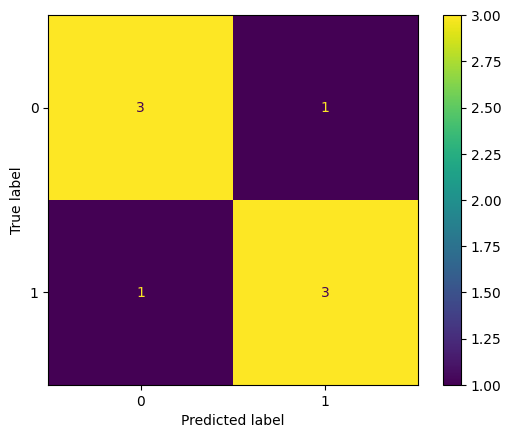

In [23]:

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

cm = confusion_matrix(y_true, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()



In [24]:
from sklearn.metrics import classification_report
print(classification_report(y_true, y_pred))


              precision    recall  f1-score   support

           0       0.75      0.75      0.75         4
           1       0.75      0.75      0.75         4

    accuracy                           0.75         8
   macro avg       0.75      0.75      0.75         8
weighted avg       0.75      0.75      0.75         8



In [26]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier  # Import RandomForestClassifier

params = {
    'n_estimators': [100, 200],
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 5],
}
grid = GridSearchCV(RandomForestClassifier(), param_grid=params, cv=5)
grid.fit(X_train, y_train)
print("Best Parameters:", grid.best_params_)



Best Parameters: {'max_depth': 3, 'min_samples_split': 2, 'n_estimators': 200}


In [27]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score
import numpy as np

# 🔹 Step 1: Train Model
best_rf = RandomForestClassifier(max_depth=3, min_samples_split=2, n_estimators=200, random_state=42)
best_rf.fit(X_train, y_train)

# 🔹 Step 2: Predict
y_pred = best_rf.predict(X_test)
y_probs = best_rf.predict_proba(X_test)

# 🔹 Step 3: Metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

# 🔹 Step 4: Confidence Score
confidence_score = np.mean(np.max(y_probs, axis=1))

# 🔹 Step 5: Print Results
print("🔍 Accuracy:", round(accuracy, 2))
print("🎯 Precision:", round(precision, 2))
print("📈 Recall:", round(recall, 2))
print("📊 F1 Score:", round(f1, 2))
print("💡 Confidence Score (mean):", round(confidence_score, 2))

print("\n📋 Classification Report:\n")
print(classification_report(y_test, y_pred))


🔍 Accuracy: 1.0
🎯 Precision: 1.0
📈 Recall: 1.0
📊 F1 Score: 1.0
💡 Confidence Score (mean): 0.99

📋 Classification Report:

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00         1
         1.0       1.00      1.00      1.00        11

    accuracy                           1.00        12
   macro avg       1.00      1.00      1.00        12
weighted avg       1.00      1.00      1.00        12



In [28]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(best_rf, X, y, cv=5)
print("📊 Cross-Validation Accuracy Scores:", scores)
print("✅ Mean CV Accuracy:", scores.mean())


📊 Cross-Validation Accuracy Scores: [0.97647059 0.97647059 0.98809524 0.96428571 0.98809524]
✅ Mean CV Accuracy: 0.9786834733893558


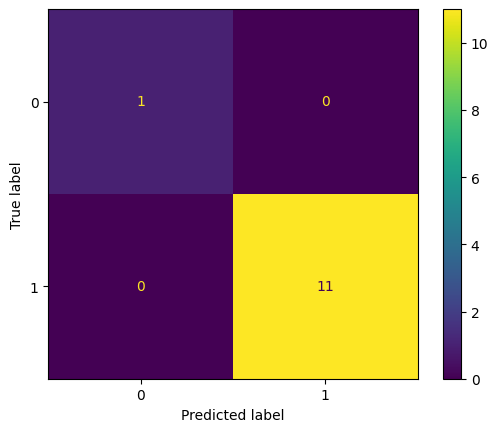

In [29]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()


<ipython-input-30-424d406e15cf>:10: UserWarning: Glyph 128300 (\N{MICROSCOPE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128300 (\N{MICROSCOPE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


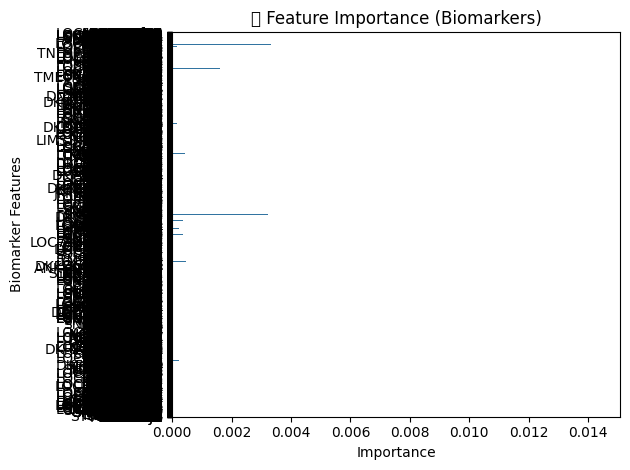

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns

feature_importances = best_rf.feature_importances_
features = X.columns
sns.barplot(x=feature_importances, y=features)
plt.title("🔬 Feature Importance (Biomarkers)")
plt.xlabel("Importance")
plt.ylabel("Biomarker Features")
plt.tight_layout()
plt.show()


In [32]:
!pip install shap



   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 17.4 MB/s eta 0:00:00


In [34]:
print(type(shap_values))
print(len(shap_values))
print(shap_values[0].shape)



<class 'numpy.ndarray'>
12
(20530, 2)


In [37]:

!pip install gradio


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.8/41.8 kB 3.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.9/46.9 MB 30.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 322.2/322.2 kB 26.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 95.2/95.2 kB 8.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 132.8/132.8 kB 12.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.5/11.5 MB 136.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.0/72.0 kB 6.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.5/62.5 kB 6.4 MB/s eta 0:00:00


In [44]:
import tensorflow as tf


# Save it in .h5 format
model.save('model.h5')






In [45]:
import tensorflow as tf

# Load the SavedModel in the original environment
model = tf.keras.models.load_model('/content/model.h5')

# Save it in .h5 format
model.save('model.h5')


In [46]:
import tensorflow as tf

# Load your saved model
model = tf.keras.models.load_model('model.h5')

# Compile the model (specify the optimizer, loss function, and metrics)
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Now you can evaluate or use the model for predictions


In [47]:
import tensorflow as tf

# Load the model
model = tf.keras.models.load_model('model.h5')  # or 'model.keras'

# Recompile the model (specify optimizer, loss function, and metrics)
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Now you can evaluate or make predictions with the model



In [48]:
# Assuming you want to predict on test data
predictions = model.predict(X_test)

# Or evaluate the model on a test set
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Loss: {loss}, Accuracy: {accuracy}')


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 354ms/step - accuracy: 1.0000 - loss: 0.2713
Loss: 0.2712971270084381, Accuracy: 1.0


In [53]:
!pip install flask-ngrok




  Using cached flask_ngrok-0.0.25-py3-none-any.whl.metadata (1.8 kB)
  Using cached flask-3.1.0-py3-none-any.whl.metadata (2.7 kB)
  Using cached blinker-1.9.0-py3-none-any.whl.metadata (1.6 kB)
Using cached flask_ngrok-0.0.25-py3-none-any.whl (3.1 kB)
Using cached flask-3.1.0-py3-none-any.whl (102 kB)
Using cached blinker-1.9.0-py3-none-any.whl (8.5 kB)
  Attempting uninstall: blinker
    Found existing installation: blinker 1.4
error: uninstall-distutils-installed-package

× Cannot uninstall blinker 1.4
╰─> It is a distutils installed project and thus we cannot accurately determine which files belong to it which would lead to only a partial uninstall.


In [54]:
!pip uninstall -y blinker


Found existing installation: blinker 1.4
error: uninstall-distutils-installed-package

× Cannot uninstall blinker 1.4
╰─> It is a distutils installed project and thus we cannot accurately determine which files belong to it which would lead to only a partial uninstall.


In [55]:
!pip install flask-ngrok


  Using cached flask_ngrok-0.0.25-py3-none-any.whl.metadata (1.8 kB)
  Using cached flask-3.1.0-py3-none-any.whl.metadata (2.7 kB)
  Using cached blinker-1.9.0-py3-none-any.whl.metadata (1.6 kB)
Using cached flask_ngrok-0.0.25-py3-none-any.whl (3.1 kB)
Using cached flask-3.1.0-py3-none-any.whl (102 kB)
Using cached blinker-1.9.0-py3-none-any.whl (8.5 kB)
  Attempting uninstall: blinker
    Found existing installation: blinker 1.4
error: uninstall-distutils-installed-package

× Cannot uninstall blinker 1.4
╰─> It is a distutils installed project and thus we cannot accurately determine which files belong to it which would lead to only a partial uninstall.


In [57]:
!pip install pyngrok



In [59]:
from pyngrok import ngrok
ngrok.set_auth_token('2w7zUXXTNqeBNzdCr5ucYJ21h5k_22NgpPzbpCQTxWsnXFWNW')  # Replace 'YOUR_NGROK_AUTHTOKEN' with your actual token



In [63]:
public_url = ngrok.connect(80)
print(f"Public URL: {public_url}")


Public URL: NgrokTunnel: "https://f276-35-232-100-163.ngrok-free.app" -> "http://localhost:80"


In [64]:
!npm install -g localtunnel


⠙⠹⠸⠼⠴⠦⠧⠇⠏⠋⠙
added 22 packages in 1s
⠙
⠙3 packages are looking for funding
⠙  run `npm fund` for details
⠙